In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df["Age"].value_counts()

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

In [7]:
df["Sex"].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [8]:
df["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [9]:
df["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [10]:
df["Na_to_K"].value_counts()

12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: Na_to_K, Length: 198, dtype: int64

In [11]:
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

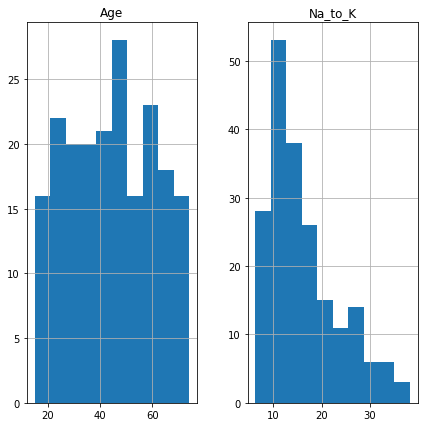

In [12]:
df.hist(bins = 10 , figsize= (7,7))
plt.show();

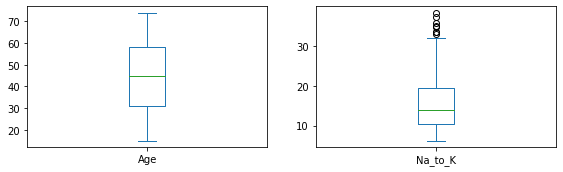

In [13]:
df.plot(kind = "box" , subplots = True , figsize = (25,15) , layout = (5,5));

In [14]:
df=df[df["Na_to_K"]<35]

In [15]:
x=df.drop('Drug',axis=1)
y=df['Drug']

In [16]:
x=pd.get_dummies(x,drop_first=True)

In [29]:
x

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [18]:
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [19]:
tahmin1=g.predict(x)
tahmin2=b.predict(x)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
accuracy_score(tahmin1,y)

0.8223350253807107

In [22]:
confusion_matrix(tahmin1,y)

array([[56,  0,  0,  0,  3],
       [14, 23,  0,  0,  0],
       [ 6,  0, 16,  0,  0],
       [12,  0,  0, 16,  0],
       [ 0,  0,  0,  0, 51]], dtype=int64)

In [23]:
accuracy_score(tahmin2,y)

0.5177664974619289

In [24]:
confusion_matrix(tahmin2,y)

array([[57, 23, 16,  7, 18],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 8,  0,  0,  9,  0],
       [23,  0,  0,  0, 36]], dtype=int64)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [26]:
k.fit(x,y)

KNeighborsClassifier()

In [27]:
tahmin3=k.predict(x)

In [28]:
accuracy_score(tahmin3,y)

0.7766497461928934

In [30]:
confusion_matrix(tahmin3,y)

array([[86,  0,  1,  0,  3],
       [ 0, 18,  0,  7,  7],
       [ 2,  0, 12,  4,  9],
       [ 0,  2,  0,  4,  2],
       [ 0,  3,  3,  1, 33]], dtype=int64)

In [31]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [32]:
l.fit(x,y)

LogisticRegression()

In [33]:
tahmin4=l.predict(x)

In [34]:
confusion_matrix(tahmin4,y)

array([[81,  6,  3,  2,  4],
       [ 0, 14,  2,  0,  0],
       [ 1,  3, 11,  0,  0],
       [ 4,  0,  0, 14,  0],
       [ 2,  0,  0,  0, 50]], dtype=int64)

In [35]:
accuracy_score(tahmin4,y)

0.8629441624365483